<h2><center>Unit 5 - Advanced Experimentation</center>
<center>Lesson 4 Challenge</center>
<center>Murali Mandayam - Thinkful DS Boot Camp Course</center>
    <center>June 2019</center></h2>

The European Social Survey data for 2012 and 2014 is given to us. This challenge addresses the following questions. 

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

For each question, we have to explain why we chose a certain approach in answering the question.

Explanation of the data file is available __[here](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html#essround)__.

The data file can be found __[here](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv)__. Once the data is shown on your browser right click and save it as a .csv file on your local drive.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the dpi for better graphs
plt.rcParams['figure.dpi'] = 200

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Suppressing annoying harmless error
import warnings
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
warnings.simplefilter('ignore')

In [2]:
# Load the ESS data.

df = pd.read_csv("ESSdata_Thinkful.csv")

# Print the first 5 rows to see a sample of the data
print(df.head())

# How many years of data is in there?
# Year = 6 ==> 2012
# Year = 7 ==> 2014
print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


In the data file the year column with value 6 is for the year 2012; and the year column with value 7 is for the year 2014.

Data for DE is very minimal and has only 14 records.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [4]:
# Create separate dataframes for each country and extract the country-wise values from our master dataframe
# Drop NaN rows while extracting

df_CH = pd.DataFrame()
df_CZ = pd.DataFrame()
df_DE = pd.DataFrame()
df_ES = pd.DataFrame()
df_NO = pd.DataFrame()
df_SE = pd.DataFrame()
#
df_CH = df[df['cntry'] == 'CH']
df_CZ = df[df['cntry'] == 'CZ']
df_DE = df[df['cntry'] == 'DE']
df_ES = df[df['cntry'] == 'ES']
df_NO = df[df['cntry'] == 'NO']
df_SE = df[df['cntry'] == 'SE']

In [5]:
df_DE.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
2862,DE,11000031.0,6,2.0,3.0,8.0,8.0,8.0,4.0,3.0,2.0,51.0,1.0
2863,DE,11000041.0,6,7.0,7.0,7.0,6.0,8.0,5.0,3.0,1.0,75.0,1.0
2864,DE,11000071.0,6,4.0,5.0,6.0,5.0,6.0,4.0,2.0,1.0,50.0,2.0
2865,DE,11000091.0,6,7.0,8.0,6.0,5.0,7.0,5.0,2.0,1.0,71.0,1.0
2866,DE,11000131.0,6,5.0,7.0,NaN,NaN,9.0,6.0,2.0,1.0,27.0,1.0


In [60]:
# Compute the difference in trust values between 2012 and 2014 by country

ch_trust = df_CH[df_CH.year == 6]['ppltrst'].reset_index(drop=True) \
         - df_CH[df_CH.year == 7]['ppltrst'].reset_index(drop=True)
#
cz_trust = df_CZ[df_CZ.year == 6]['ppltrst'].reset_index(drop=True) \
         - df_CZ[df_CZ.year == 7]['ppltrst'].reset_index(drop=True)
#
de_trust = df_DE[df_DE.year == 6]['ppltrst'].reset_index(drop=True) \
         - df_DE[df_DE.year == 7]['ppltrst'].reset_index(drop=True)
#
es_trust = df_ES[df_ES.year == 6]['ppltrst'].reset_index(drop=True) \
         - df_ES[df_ES.year == 7]['ppltrst'].reset_index(drop=True)
#
no_trust = df_NO[df_NO.year == 6]['ppltrst'].reset_index(drop=True) \
         - df_NO[df_NO.year == 7]['ppltrst'].reset_index(drop=True)
#
se_trust = df_SE[df_SE.year == 6]['ppltrst'].reset_index(drop=True) \
         - df_SE[df_SE.year == 7]['ppltrst'].reset_index(drop=True)

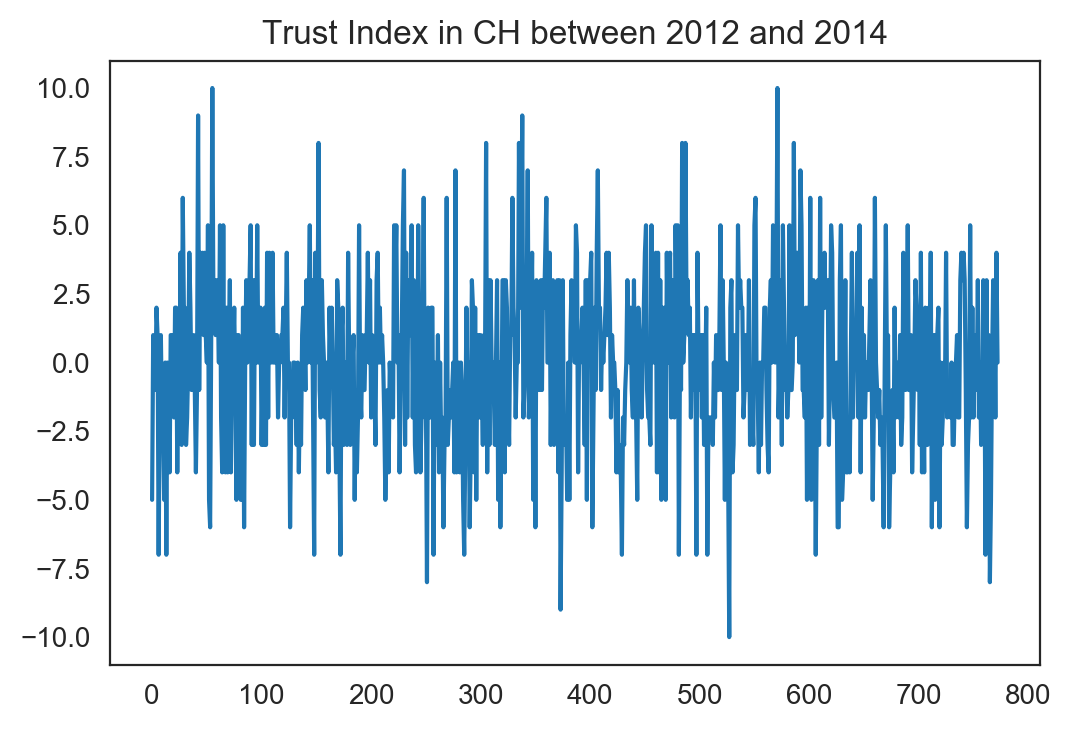

In [71]:
ch_trust.sort_values(ascending=True)

plt.rcParams['figure.dpi'] = 200
plt.title('Trust Index in CH between 2012 and 2014')
ch_trust.plot()

In the above cell we are plotting the difference in trust ratings between 2012 and 2014. If there were no changes between these 2 years the result should have been zero. We will also compute the t-test for paired samples since we are conducting tests where all participants are the same between 2012 and 2014.

In [83]:
print('CH Results ', stats.ttest_rel(df_CH[df_CH.year == 6]['ppltrst'],
                                     df_CH[df_CH.year == 7]['ppltrst'], nan_policy='omit'))

print('CZ Results ', stats.ttest_rel(df_CZ[df_CZ.year == 6]['ppltrst'],
                                     df_CZ[df_CZ.year == 7]['ppltrst'], nan_policy='omit'))

print('DE Results ', stats.ttest_rel(df_DE[df_DE.year == 6]['ppltrst'],
                                     df_DE[df_DE.year == 7]['ppltrst'], nan_policy='omit'))

print('ES Results ', stats.ttest_rel(df_ES[df_ES.year == 6]['ppltrst'],
                                     df_ES[df_ES.year == 7]['ppltrst'], nan_policy='omit'))

print('NO Results ', stats.ttest_rel(df_NO[df_NO.year == 6]['ppltrst'],
                                     df_NO[df_NO.year == 7]['ppltrst'], nan_policy='omit'))

print('SE Results ', stats.ttest_rel(df_SE[df_SE.year == 6]['ppltrst'],
                                     df_SE[df_SE.year == 7]['ppltrst'], nan_policy='omit'))

CH Results  Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
CZ Results  Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)
DE Results  Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
ES Results  Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320284)
NO Results  Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)
SE Results  Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


<h2>Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample</h2>
<br>Based on the t-test results we can say that ES and SE experienced changes in trust. ES maybe more trusting (with a positive t-value) and SE less trusting (with a low negative t-value). Not much difference in other countries.

In [64]:
# Compute the difference in happiness values between 2012 and 2014 by country

ch_happy = df_CH[df_CH.year == 6]['happy'].reset_index(drop=True) \
    - df_CH[df_CH.year == 7]['happy'].reset_index(drop=True)
#
cz_happy = df_CZ[df_CZ.year == 6]['happy'].reset_index(drop=True) \
    - df_CZ[df_CZ.year == 7]['happy'].reset_index(drop=True)
#
de_happy = df_DE[df_DE.year == 6]['happy'].reset_index(drop=True) \
    - df_DE[df_DE.year == 7]['happy'].reset_index(drop=True)
#
es_happy = df_ES[df_ES.year == 6]['happy'].reset_index(drop=True) \
    - df_ES[df_ES.year == 7]['happy'].reset_index(drop=True)
#
no_happy = df_NO[df_NO.year == 6]['happy'].reset_index(drop=True) \
    - df_NO[df_NO.year == 7]['happy'].reset_index(drop=True)
#
se_happy = df_SE[df_SE.year == 6]['happy'].reset_index(drop=True) \
    - df_SE[df_SE.year == 7]['happy'].reset_index(drop=True)

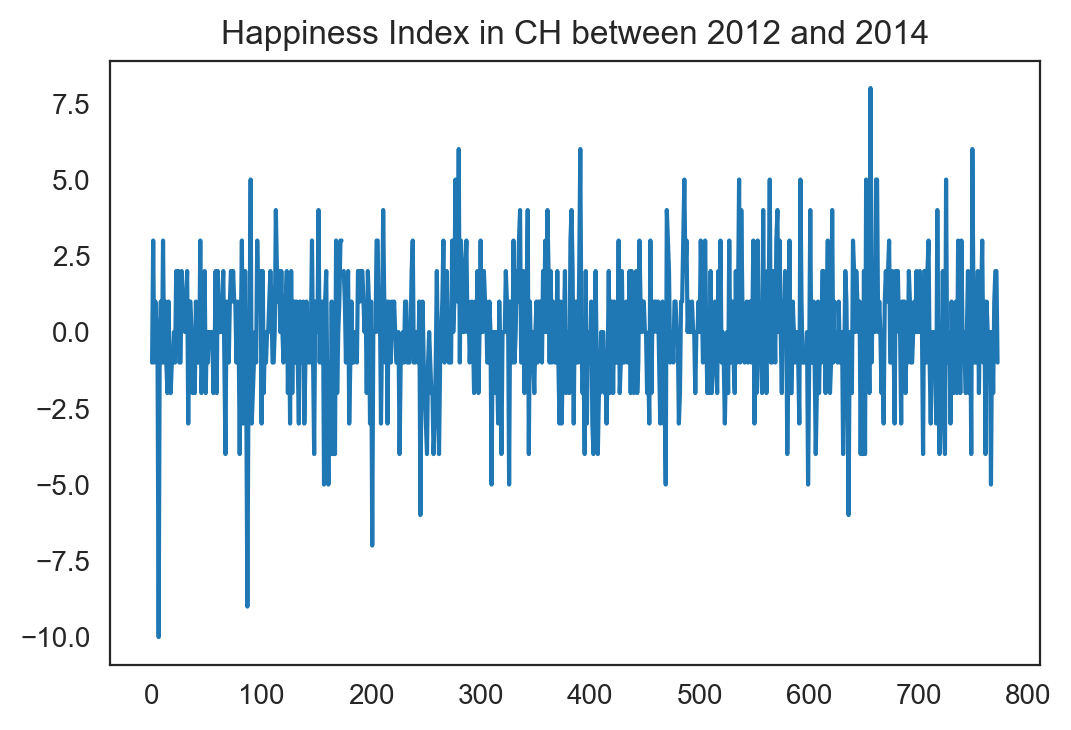

In [65]:
plt.rcParams['figure.dpi'] = 200

plt.title('Happiness Index in CH between 2012 and 2014')
ch_happy.plot()

In [84]:
print('CH Results ', stats.ttest_rel(df_CH[df_CH.year == 6]['happy'],
                                     df_CH[df_CH.year == 7]['happy'], nan_policy='omit'))

print('CZ Results ', stats.ttest_rel(df_CZ[df_CZ.year == 6]['happy'],
                                     df_CZ[df_CZ.year == 7]['happy'], nan_policy='omit'))

print('DE Results ', stats.ttest_rel(df_DE[df_DE.year == 6]['happy'],
                                     df_DE[df_DE.year == 7]['happy'], nan_policy='omit'))

print('ES Results ', stats.ttest_rel(df_ES[df_ES.year == 6]['happy'],
                                     df_ES[df_ES.year == 7]['happy'], nan_policy='omit'))

print('NO Results ', stats.ttest_rel(df_NO[df_NO.year == 6]['happy'],
                                     df_NO[df_NO.year == 7]['happy'], nan_policy='omit'))

print('SE Results ', stats.ttest_rel(df_SE[df_SE.year == 6]['happy'],
                                     df_SE[df_SE.year == 7]['happy'], nan_policy='omit'))

CH Results  Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355429063)
CZ Results  Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.1458454843389451)
DE Results  Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)
ES Results  Ttest_relResult(statistic=1.613832417735418, pvalue=0.10682451556479494)
NO Results  Ttest_relResult(statistic=4.2856826576235925, pvalue=2.067453013405473e-05)
SE Results  Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591233714)


<h2>Question 2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.</h2>
<br>Based on the t-test results we can say that NO is way too happy! Not much difference in other countries.


<h2>Question 3: Who reported watching more TV in 2012, men or women?</h2>
<br>Based on the results below the average time of TV watching by males and females is very close, and has no difference.

In [138]:
df_2012 = df[df.year == 6]
df_tv_audience_male = df_2012[df_2012.gndr == 1]
df_tv_audience_female = df_2012[df_2012.gndr == 2]
print('Average time - Male watching TV in 2012 across all countries = ',
      df_tv_audience_male['tvtot'].mean())
print('Average time - Female watching TV in 2012 across all countries = ',
      df_tv_audience_female['tvtot'].mean())

Average time - Male watching TV in 2012 across all countries =  3.901906090190609
Average time - Female watching TV in 2012 across all countries =  3.944392523364486


In [139]:
male = df_tv_audience_male['tvtot']

In [140]:
female = df_tv_audience_female['tvtot']

In [141]:
# Limiting the data to plot bargraph. Original data had 2143 rows. Trimming it to 100 (which is still large to plot)
male_trimmed = male.iloc[:100]
female_trimmed = female.iloc[:100]

In [142]:
print(male_trimmed.shape)
print(female_trimmed.shape)

(100,)
(100,)


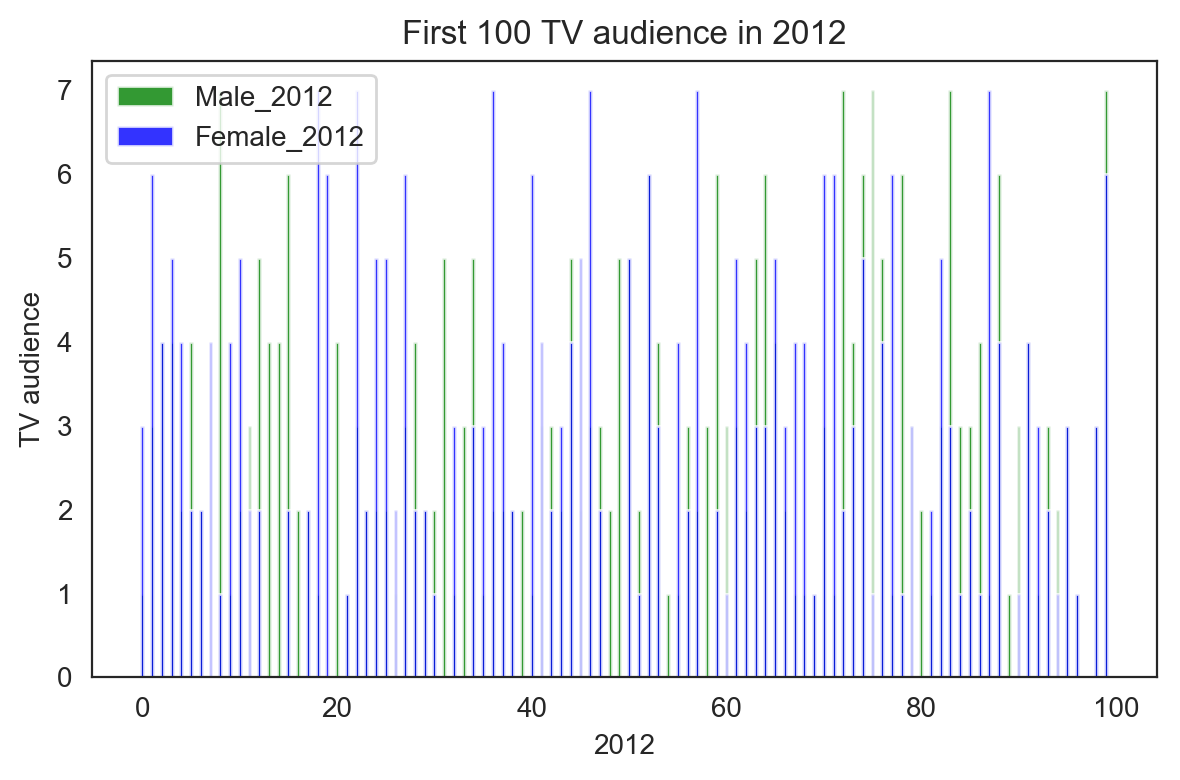

In [143]:
groups = 100
figs, ax = plt.subplots()
index = np.arange(groups)
bar_width = 0.4
opacity = 0.8

bar_1 = plt.bar(index, male_trimmed, bar_width,
                alpha=opacity, color='g', label='Male_2012')

bar_2 = plt.bar(index, female_trimmed, bar_width, alpha=opacity,
                color='b', label='Female_2012')

plt.xlabel('2012')
plt.ylabel('TV audience')
plt.title('First 100 TV audience in 2012')
plt.legend()

plt.tight_layout()
plt.show()

<h2>Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?</h2>

Based on the results below people living with partners believe more that other people are fair.

In [150]:
df_fair_partner = df_2012[df_2012.partner == 1]
df_fair_no_partner = df_2012[df_2012.partner == 2]

print('Average of: People with partners who believed other peopler were fair ',
      df_fair_partner['pplfair'].mean())
print('Average of: People living alone who believed other peopler were fair ',
      df_fair_no_partner['pplfair'].mean())

Average of: People with partners who believed other peopler were fair  6.080736012016523
Average of: People living alone who believed other peopler were fair  5.856965174129353


<h2>Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?</h2>
<br>
Based on the results below:?<br>
- People in CH meet others at least once a week<br>
- People in CZ meet others at least once a month<br>
- People in ES meet others at least once a week

<br>Because there are 3 or more groups here we will perform the one-way ANOVA tests (assuming distribution is normal) for t-test and p-value.

In [156]:
df_2014 = df[df.year == 7]
CH_2014 = df_2014[df_2014.cntry=='CH']
CZ_2014 = df_2014[df_2014.cntry=='CZ']
ES_2014 = df_2014[df_2014.cntry=='ES']

print('Average of how often people socially meet with friends, relatives or colleagues in CH =',
      CH_2014['sclmeet'].mean())

print('Average of how often people socially meet with friends, relatives or colleagues in CZ =',
      CZ_2014['sclmeet'].mean())

print('Average of how often people socially meet with friends, relatives or colleagues in ES =',
      ES_2014['sclmeet'].mean())

Average of how often people socially meet with friends, relatives or colleagues in CH = 5.160621761658031
Average of how often people socially meet with friends, relatives or colleagues in CZ = 4.445801526717557
Average of how often people socially meet with friends, relatives or colleagues in ES = 5.2601156069364166


In [158]:
F, p = stats.f_oneway(CH_2014['sclmeet'].dropna(), CZ_2014['sclmeet'].dropna(), ES_2014['sclmeet'].dropna())

# The F statistic.
print(F)

# If the p-value is < .05 then that would lead us to believe the group means were
# not all similar in the population.
print(p)

73.90567444488121
5.903434781205236e-32


In [159]:
# The p-value says the 3 groups differ significantly. Let us find out which group - CH, CZ or ES - is different
print(stats.ttest_ind(CH_2014['sclmeet'].dropna(), CZ_2014['sclmeet'].dropna()))
print(stats.ttest_ind(CZ_2014['sclmeet'].dropna(), ES_2014['sclmeet'].dropna()))
print(stats.ttest_ind(ES_2014['sclmeet'].dropna(), CH_2014['sclmeet'].dropna()))

Ttest_indResult(statistic=9.675850699914886, pvalue=1.7204743885392493e-21)
Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)
Ttest_indResult(statistic=1.5343317353073618, pvalue=0.12510774525042745)


Based on the above results:
<br>- CH and CZ differ significantly
<br>- CZ and ES differ significantly
<br>- ES and CH do not differ much

<h2> Question 6: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?</h2>

In [157]:
print('Average of how often people take part in social activities in CH =',
      CH_2014['sclact'].mean())

print('Average of how often people take part in social activities in CZ =',
      CZ_2014['sclact'].mean())

print('Average of how often people take part in social activities in ES =',
      ES_2014['sclact'].mean())

Average of how often people take part in social activities in CH = 2.7816993464052286
Average of how often people take part in social activities in CZ = 2.703076923076923
Average of how often people take part in social activities in ES = 2.6168776371308016


Keep this cell for future.
Grouping/aggregating data using a different pandas API
df_by_columns = df.set_index([df.groupby('cntry').cumcount(), 'cntry']).unstack()
df_by_columns['ppltrst'].isnull().sum()
Plot the 'ppltrst' values to find its distribution
df_by_columns['ppltrst'].hist(sharex=True, sharey=True)